In [1]:
# Import necessary libraries
from sklearn.linear_model import Ridge, LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score,log_loss,r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV,train_test_split ,StratifiedKFold,KFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import VotingClassifier, BaggingClassifier,BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import *
from sklearn.svm import SVC
from sklearn.pipeline import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import os

warnings.simplefilter('ignore')

os.chdir('D:\Datasets')

conc = pd.read_csv('Concrete_Data.csv')
conc

,Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [2]:
x= conc.drop('Strength',axis=1)
y=conc['Strength']

In [3]:
# Define the parameter grid for hyperparameter tuning
params = {
    'max_features': [3, 4, 5, 6, 7],
    'max_depth': [None, 3, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

# Create a K-Fold cross-validation object with 5 splits, shuffling the data, and a random state of 24
kfold = KFold(n_splits=5, shuffle=True, random_state=24)

# Create a Random Forest Regressor with a random state of 24
rf = RandomForestRegressor(random_state=24)

# Create a GridSearchCV object to perform cross-validation and hyperparameter tuning
# Use the Random Forest Regressor as the estimator, the parameter grid defined above, the K-Fold cross-validation,
# set the verbosity to 3
gcv = GridSearchCV(rf, param_grid=params, verbose=3, cv=kfold)

# Fit the GridSearchCV object to the entire dataset (x and y)
gcv.fit(x, y)

# Print the best parameters found by the GridSearchCV
print("Best Parameters:", gcv.best_params_)

# Print the best score found by the GridSearchCV
print("Best Score:", gcv.best_score_)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
[CV 1/5] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2;, score=0.922 total time=   0.2s
[CV 2/5] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2;, score=0.885 total time=   0.2s
[CV 3/5] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2;, score=0.924 total time=   0.2s
[CV 4/5] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2;, score=0.904 total time=   0.2s
[CV 5/5] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2;, score=0.925 total time=   0.2s
[CV 1/5] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=5;, score=0.919 total time=   0.1s
[CV 2/5] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=5;, score=0.880 total time=   0.1s
[CV 3/5] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=5;, score=0.918 total time= 

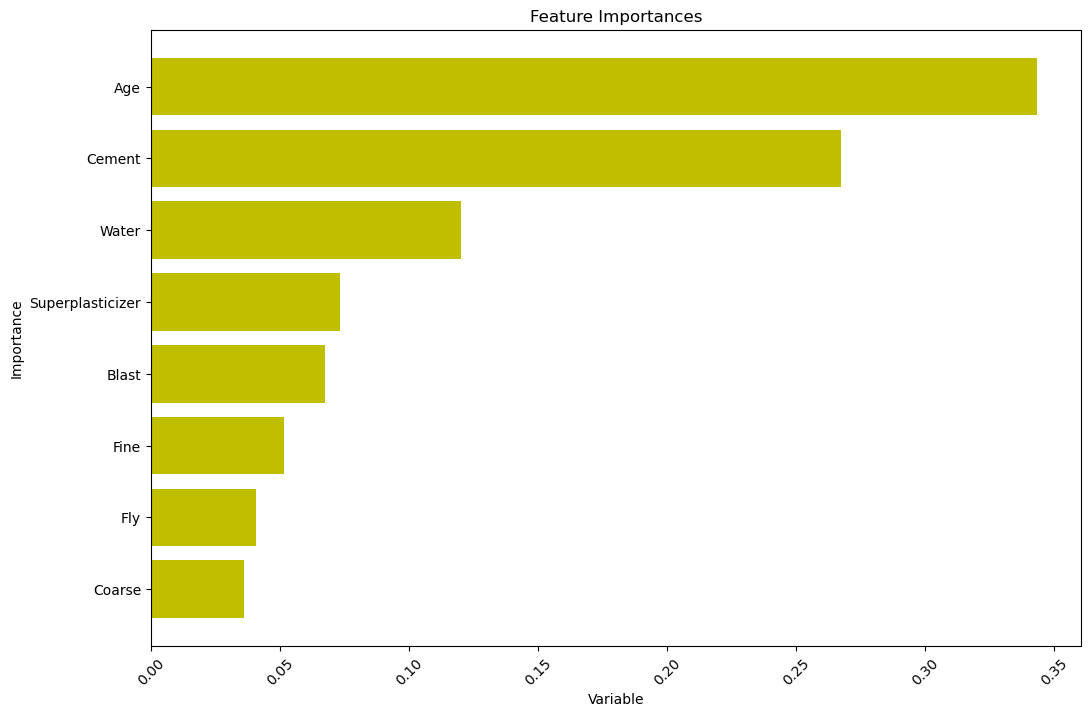

In [4]:
# Get the best estimator (Random Forest Regressor) from the GridSearchCV
best_model = gcv.best_estimator_

# Create a DataFrame with the feature names and their corresponding importances
pd_imp = pd.DataFrame({'var': list(x.columns), 'imp': best_model.feature_importances_})

# Sort the DataFrame by the importance values in descending order
pd_imp.sort_values(by='imp', inplace=True)

# Create a horizontal bar plot of the feature importances
plt.figure(figsize=(12, 8))  # Set the figure size
plt.barh(pd_imp['var'], pd_imp['imp'], color='y')

# Add labels and title
plt.xlabel('Variable')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.ylabel('Importance')
plt.title('Feature Importances')

# Display the plot
plt.show()

# Feature Importance Analysis

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END max_depth=1, max_features=None, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=None, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=None, min_samples_split=1;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=None, min_samples_split=1;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=None, min_samples_split=1;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=None, min_samples_split=5;, score=0.223 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=None, min_samples_split=5;, score=0.148 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=None, min_samples_split=5;, score=0.323 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=None, min_samples_split=5;, score=0.205 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=None, min_samples_split=5;,

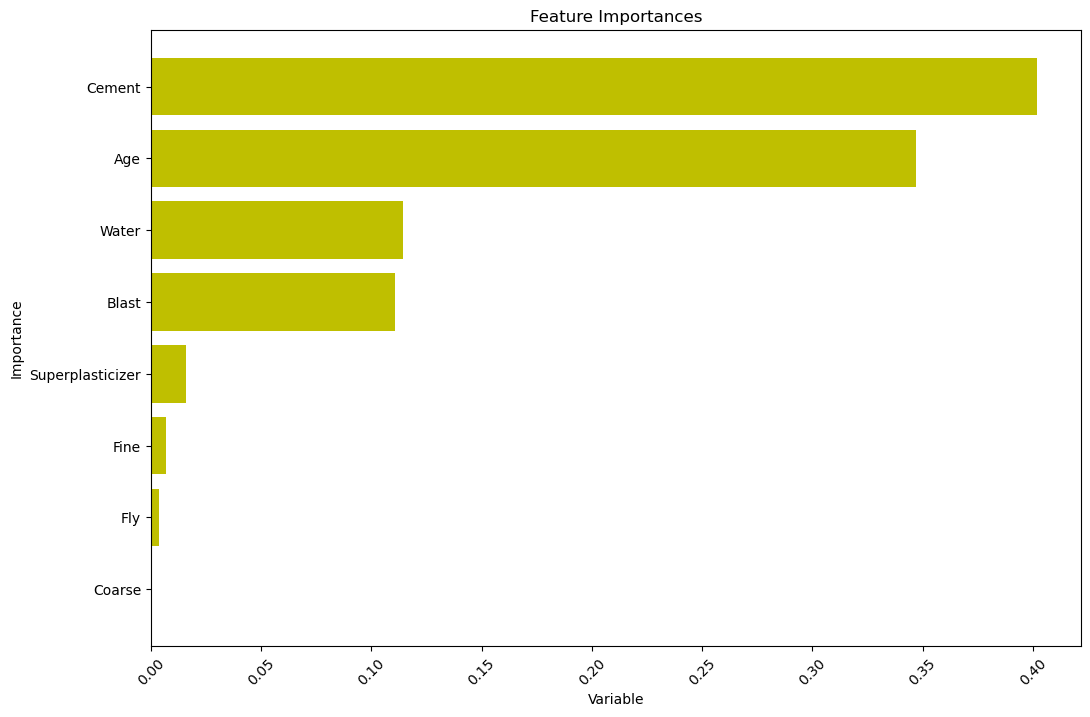

In [5]:
# Create a Decision Tree Regressor with a random state of 24
dtc = DecisionTreeRegressor(random_state=24)

# Define the parameter grid for hyperparameter tuning
params = {
    'max_features': [None, 3, 5],
    'max_depth': [1, 3, 5],
    'min_samples_split': [1, 5, 10]
}

# Create a GridSearchCV object to perform cross-validation and hyperparameter tuning
# Use the Decision Tree Regressor as the estimator, the parameter grid defined above, the K-Fold cross-validation,
# set the verbosity to 3
gcv_s = GridSearchCV(dtc, param_grid=params, verbose=3, cv=kfold)

# Fit the GridSearchCV object to the entire dataset (x and y)
gcv_s.fit(x, y)

# Print the best parameters found by the GridSearchCV
print("Best Parameters:", gcv.best_params_)

# Print the best score found by the GridSearchCV
print("Best Score:", gcv.best_score_)

# Get the best estimator (Decision Tree Regressor) from the GridSearchCV
best_tree = gcv_s.best_estimator_

# Create a DataFrame with the feature names and their corresponding importances
pd_imp = pd.DataFrame({'var': list(x.columns), 'imp': best_tree.feature_importances_})

# Sort the DataFrame by the importance values in descending order
pd_imp.sort_values(by='imp', inplace=True)

# Create a horizontal bar plot of the feature importances
plt.figure(figsize=(12, 8))  # Set the figure size
plt.barh(pd_imp['var'], pd_imp['imp'], color='y')

# Add labels and title
plt.xlabel('Variable')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.ylabel('Importance')
plt.title('Feature Importances')

# Display the plot
plt.show()